# Uber Data Analysis - New York Trips

Dataset Used: Uber Pickup Dataset

This data contains on over 4.5 million Uber pickups in New York City from April to September 2014, and 14.3 million more Uber pickups from January to June 2015. Trip-level data on 10 other for-hire vehicle (FHV) companies, as well as aggregated data for 329 FHV companies, is also included.

# Import R Libraries
* ggplot2: ggplot2 is the most popular data visualization install.packages that is most widely used for creating aesthetic visualization plots.
* ggthemes: This is adds extra Themes, Scales, and Geoms that can be used with ggplot2
* lubridate: Use time-frames in the dataset
* dplyr: Data Manipulation
* tidyr: Tidy the data
* DT: Datatables in JS
* scales: With the help of graphical scales, we can automatically map the data to the correct scales with well-placed axes and legends.

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)
library(ggthemes)
library(DT)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
library(tidyverse) # metapackage of all tidyverse packages

# Read the Dataset

In [4]:
apr_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv")
may_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv")
jun_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv")
jul_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
aug_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv")
sep_data <- read.csv("../input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv")

In [5]:
data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)

In [9]:
data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")
data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")
data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)

In [10]:
data_2014$day <- factor(day(data_2014$Date.Time))
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))
data_2014$year <- factor(year(data_2014$Date.Time))
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))
data_2014$hour <- factor(hour(hms(data_2014$Time)))
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

# Analysing the Data

# Trips by Hours in a Day

In [11]:
hour_data <- data_2014 %>%
           group_by(hour) %>%
               dplyr::summarize(Total = n()) 
datatable(hour_data)

print(hour_data)

HTML widgets cannot be represented in plain text (need html)

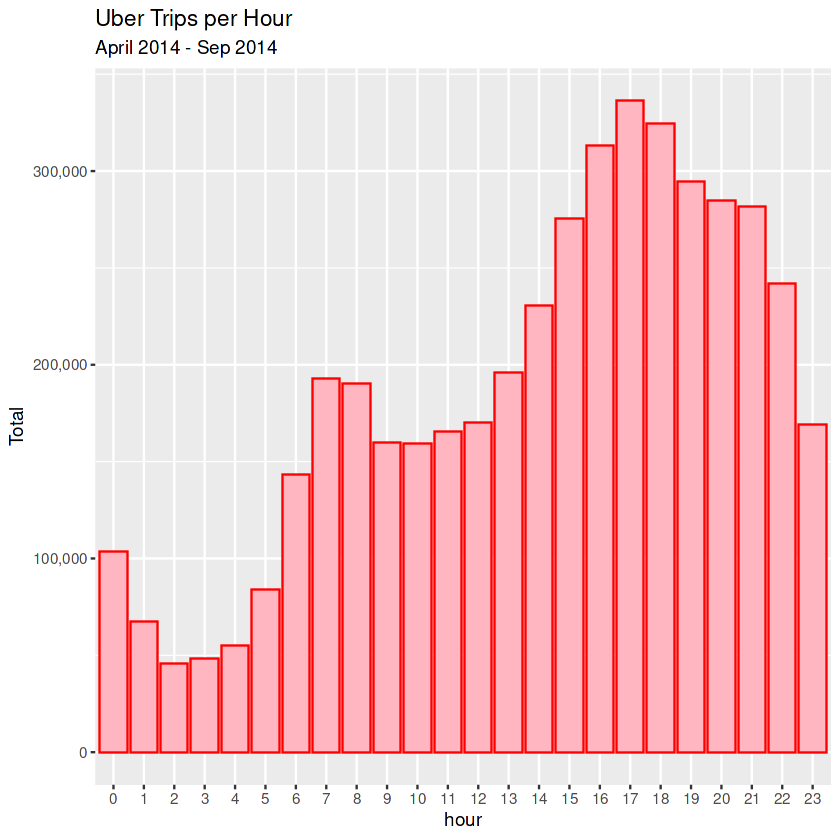

In [12]:
ggplot(hour_data, aes(hour, Total)) + 
        geom_bar( stat = "identity", fill = "lightpink", color = "red") +
           ggtitle("Uber Trips per Hour",
                   subtitle = "April 2014 - Sep 2014") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

# Uber Trips Per Hour with Months

In [13]:
month_hour <- data_2014 %>%
          group_by(month, hour) %>%
             dplyr::summarize(Total = n())

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


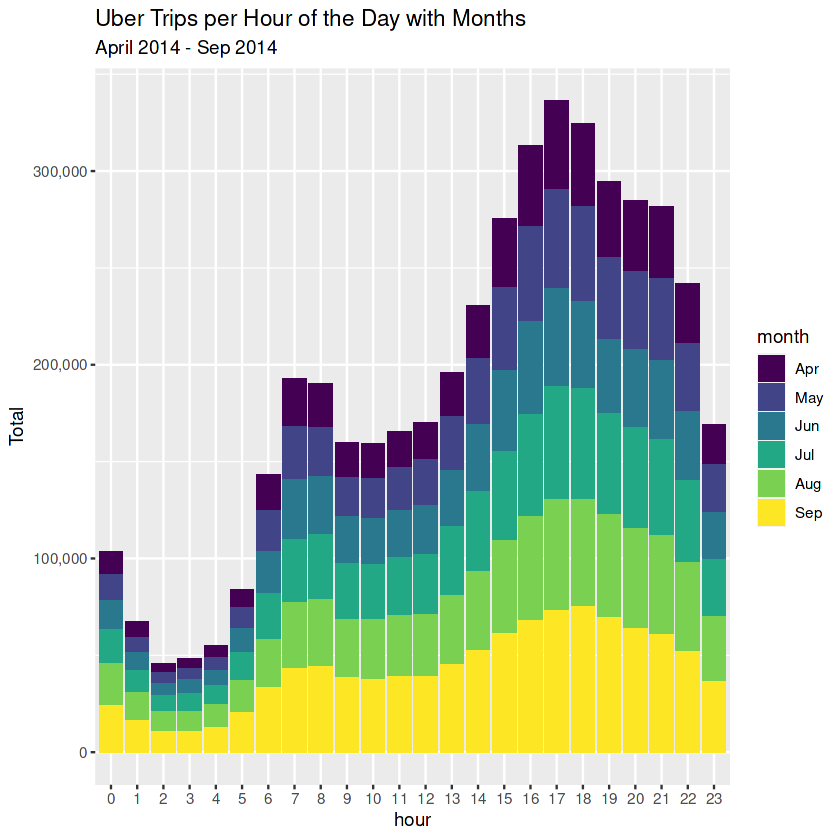

In [14]:
ggplot(month_hour, aes(hour, Total, fill = month)) + 
       geom_bar( stat = "identity") +
          ggtitle("Uber Trips per Hour of the Day with Months",
                   subtitle = "April 2014 - Sep 2014") +
           scale_y_continuous(labels = comma)

# Add colours to each Months

In [15]:
colors = c("#FBBCC0","#EB6A84","#F28C49","#F5E73F","#54C7A8","#55FFFE","#027DA2")

In [16]:
month_group <- data_2014 %>%
          group_by(month) %>%
             dplyr::summarize(Total = n()) 
datatable(month_group)

HTML widgets cannot be represented in plain text (need html)

# Chart from  April - September

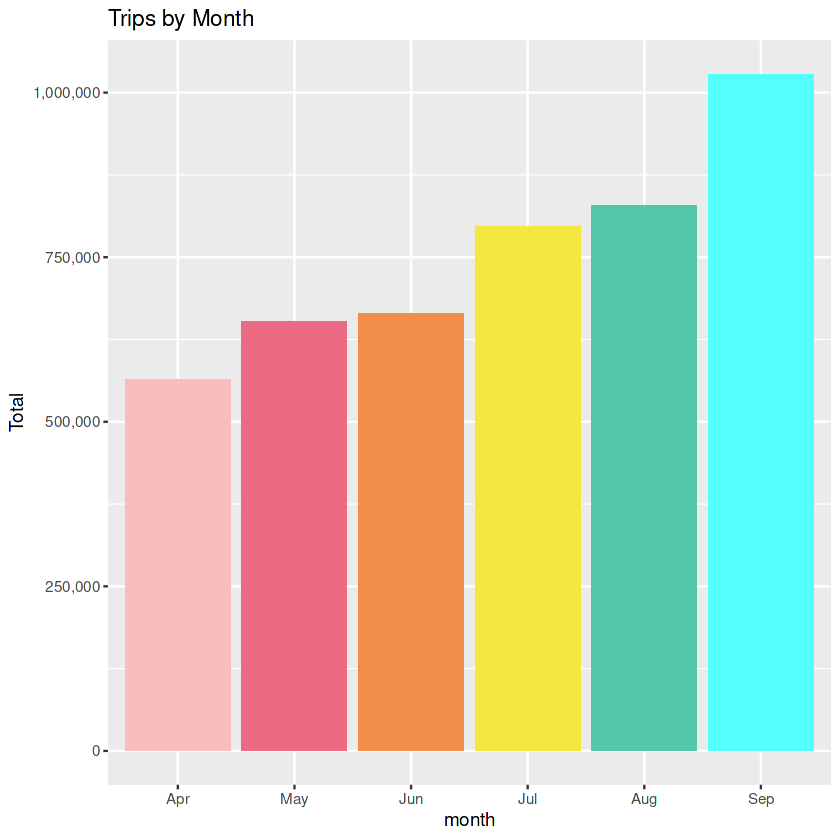

In [17]:
ggplot(month_group , aes(month, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Month") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors)

# Trips by Day of the Month

In [18]:
day_group <- data_2014 %>%
          group_by(day) %>%
             dplyr::summarize(Total = n()) 
datatable(day_group)

HTML widgets cannot be represented in plain text (need html)

**Chart**

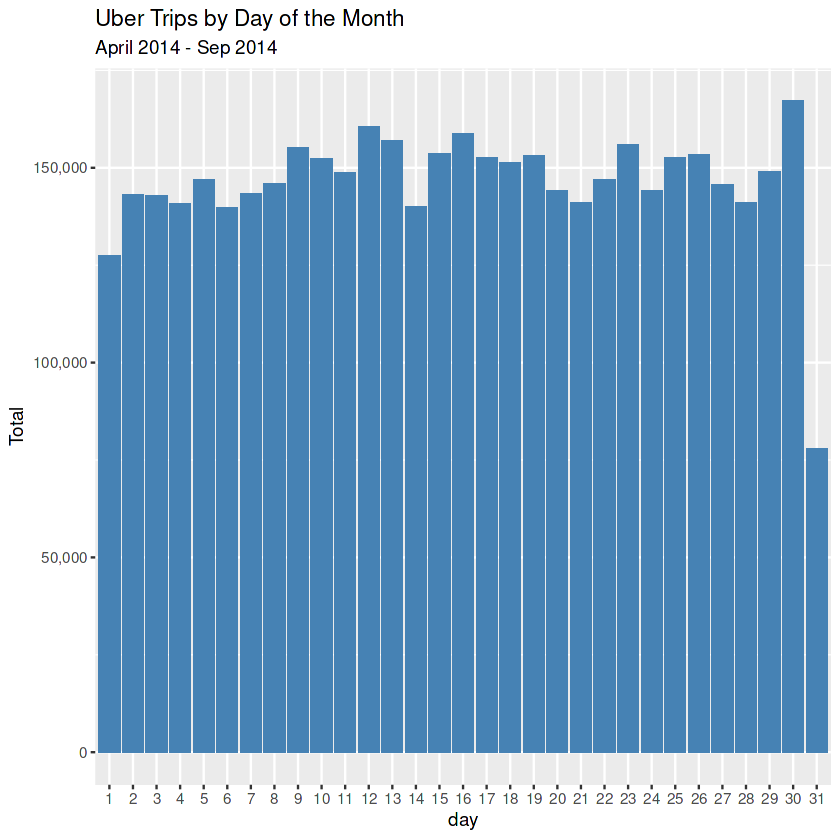

In [19]:
ggplot(day_group, aes(day, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue") +
           ggtitle("Uber Trips by Day of the Month",
                   subtitle = "April 2014 - Sep 2014") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

# Each Day of the Week

In [20]:
month_weekday <- data_2014 %>%
         group_by(month, dayofweek) %>%
             dplyr::summarize(Total = n())

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


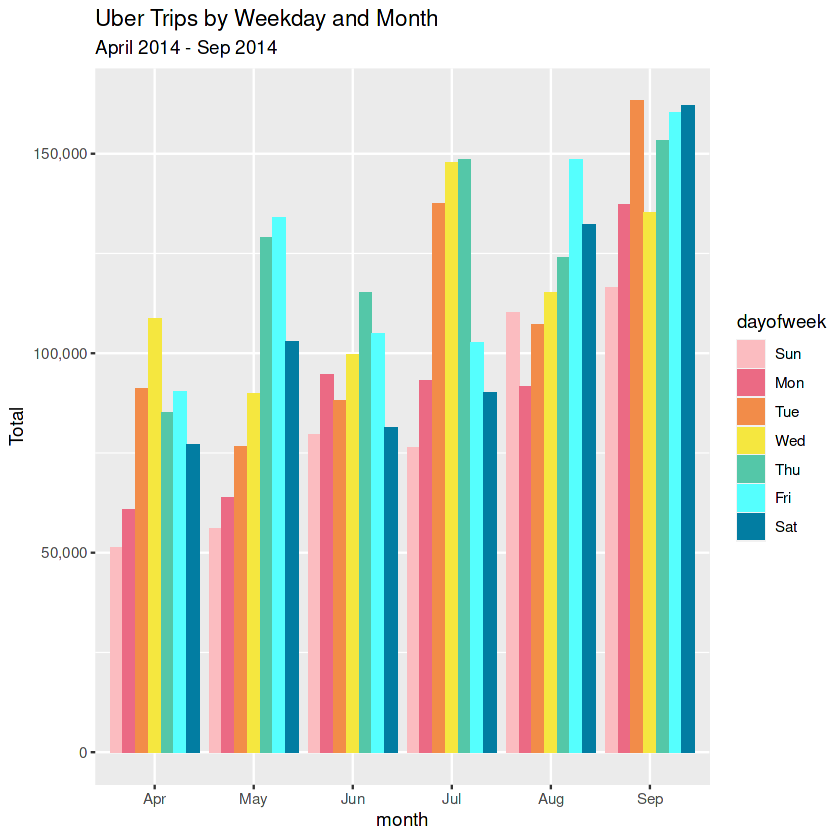

In [21]:
ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Uber Trips by Weekday and Month",
                   subtitle = "April 2014 - Sep 2014") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colors)

# Trips by Base

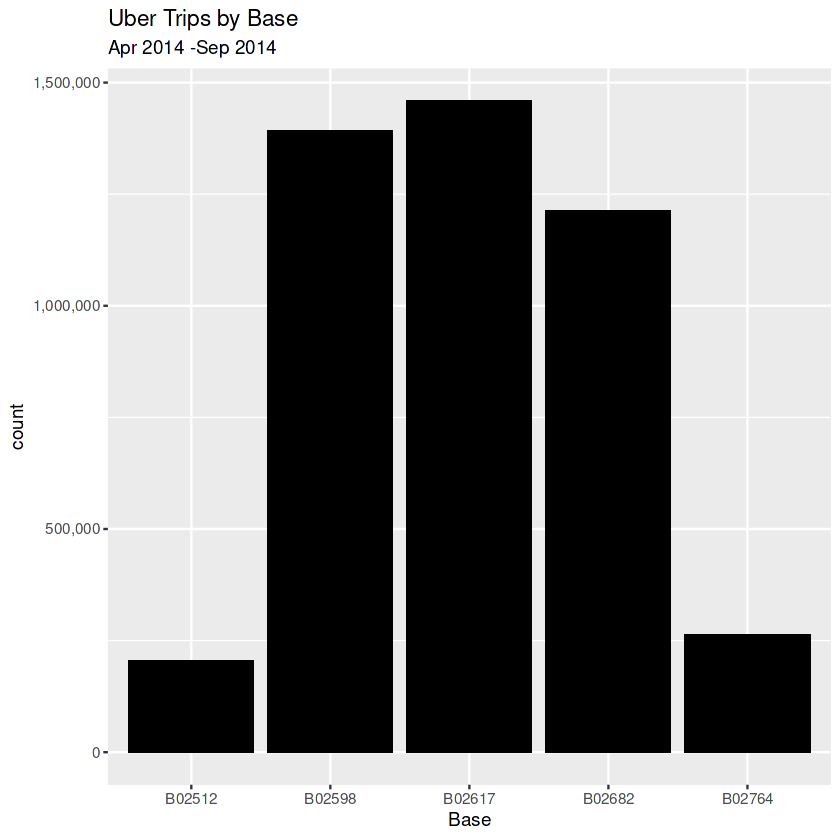

In [23]:
ggplot(data_2014, aes(Base)) + 
 geom_bar(fill = "black") +
 scale_y_continuous(labels = comma) +
 ggtitle("Uber Trips by Base"
        ,subtitle = "Apr 2014 -Sep 2014")

# Trips by Bases and DayofWeek

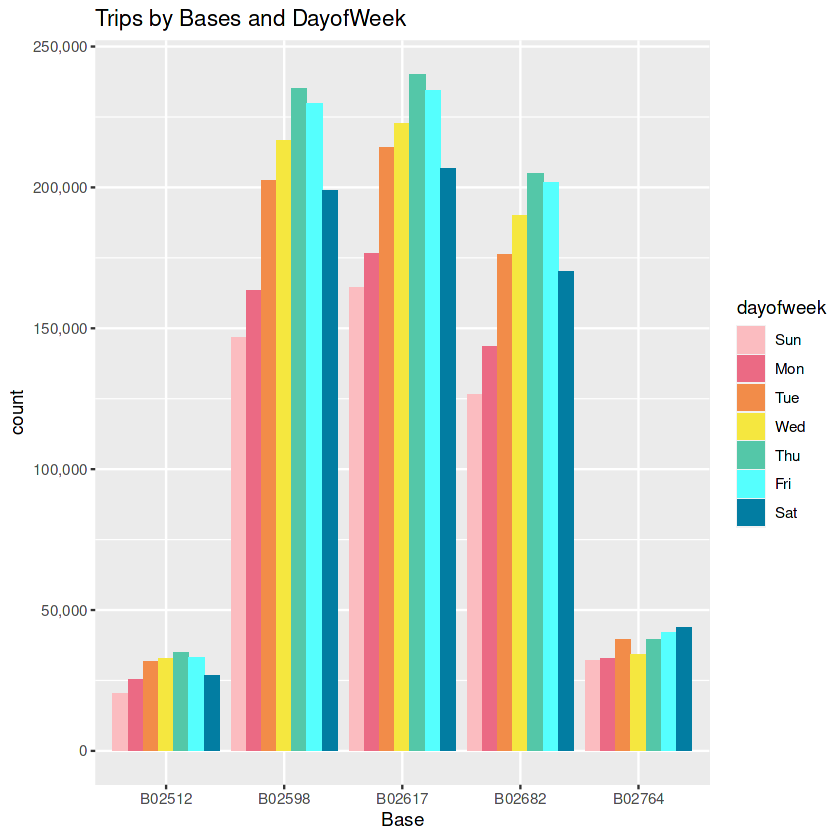

In [24]:
ggplot(data_2014, aes(Base, fill = dayofweek)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and DayofWeek") +
 scale_fill_manual(values = colors)

# Map Visualization of Rides in NY

In [25]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004

Warning message:
“Removed 71701 rows containing missing values (`geom_point()`).”


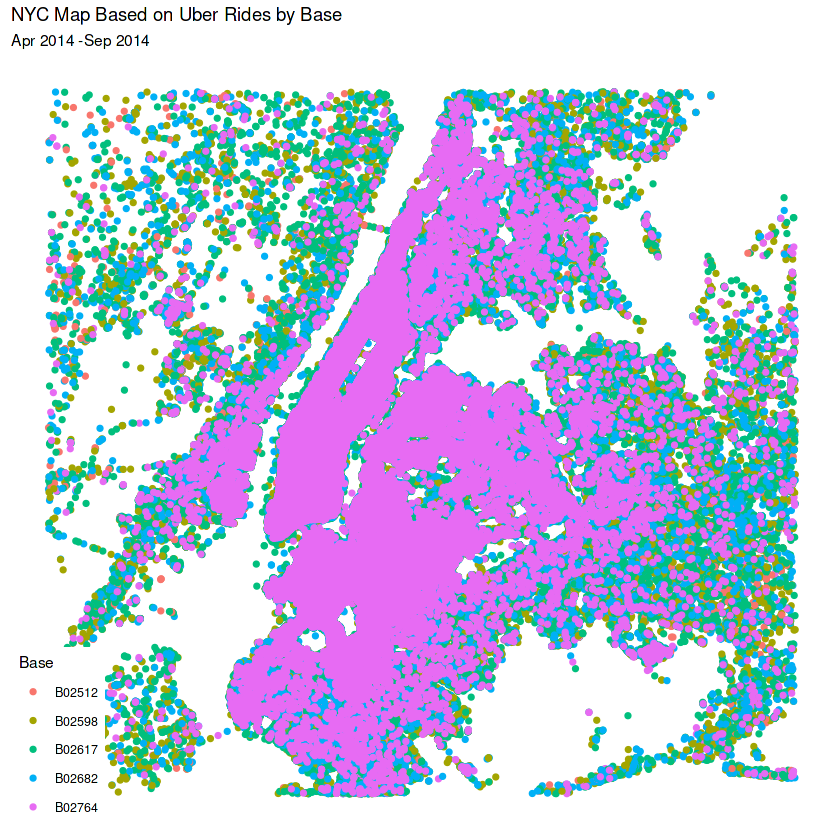

In [26]:
ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
       theme_map() +
          ggtitle("NYC Map Based on Uber Rides by Base"
                 ,subtitle = "Apr 2014 -Sep 2014")